In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import shutil
import matplotlib.dates as mdates
import time
from tqdm import tqdm_notebook as tqdm
import warnings
import matplotlib.pyplot as plt
import ROOT
from array import array
# %pip install Wand
from IPython.display import Image
from wand.image import Image as WImage

Welcome to JupyROOT 6.24/02


In [2]:
def deflectionVsD(R,B,LB,theta,phi):
ROOT.gStyle.SetLabelFont(132,"xyz")
ROOT.gStyle.SetLabelSize(0.06,"xyz")
ROOT.gStyle.SetTitleFont(132,"xyz")
ROOT.gStyle.SetTitleSize(0.07,"xyz")
ROOT.gStyle.SetPadLeftMargin(0.13)
ROOT.gStyle.SetPadBottomMargin(0.14)
ROOT.gStyle.SetTitleOffset(0.90,"x")
ROOT.gStyle.SetTitleOffset(0.70,"y")
ROOT.gStyle.SetTitleOffset(0.70,"z")
ROOT.gStyle.SetTextFont(120)
ROOT.gStyle.SetLineWidth(2)
ROOT.gStyle.SetHistLineWidth(3)
ROOT.gStyle.SetFrameLineWidth(2)
ROOT.gStyle.SetMarkerStyle(7)



NRGBs=5
NCont=510
stop=[0.00,0.34, 0.61,0.84,1.00]
red=[0.215861, 0.826185, 0.841820, 0.905216, 0.587045 ]
green=[ 0.551260, 0.891598, 0.833696, 0.486757, 0.291068 ]
blue=[0.504513, 0.575184, 0.325583, 0.144282, 0.137044 ]

stopArray=array('d',stop)
redArray=array('d',red)
greenArray=array('d',green)
blueArray=array('d',blue)

ROOT.TColor.CreateGradientColorTable(int(NRGBs),stopArray,redArray,greenArray,blueArray,int(NCont))
df_elongation=pd.read_csv(r"../../src/results/one_sphere/ang_"+str(theta)+"/cone_angle"+str(phi)\
                          +"/proton/L_B_"+str(LB)+"Mpc/B_"+str(B)+"nG/results_R"+str(R)+".txt",sep="\s+", header=0).to_numpy()
df_energy=pd.read_csv(r"../../src/results/one_sphere/ang_20/cone_angle"+str(40)\
    +"/proton/L_B_1.0Mpc/B_0.001nG/energy_"+str(100)+"Mpc.txt",sep="\s+",header=None).to_numpy()

h=ROOT.TH2F("","",40,17,21,90,-4,5)    

for i in range(0,len(df_elongation)):
    h.Fill(np.log10(df_energy[i,0]*np.power(10,18)),np.log10(df_elongation[i,0]))

IndentationError: expected an indented block (<ipython-input-2-c77337b51d92>, line 2)

In [2]:
def deflectionDistribution(R,B,LB,theta,phi):
    df=pd.read_csv(r"../../src/results/one_sphere/ang_"+str(theta)+"/cone_angle"+str(phi)+"/proton/L_B_"+str(LB)+"Mpc/B_"+str(B)+"nG/results_R"+str(R)+".txt",sep="\s+", header=0)

    alpha=[]

    
    for i in range(len(df)):
        P0x=df["P0x"][i]
        P0y=df["P0y"][i]
        P0z=df["P0z"][i]
        
        Px=df["Px"][i]
        Py=df["Py"][i]
        Pz=df["Pz"][i]

        P0=np.array([P0x,P0y,P0z])
        P=np.array([Px,Py,Pz])
        
        alpha.append(np.degrees((np.arccos((np.inner(P,P0))/(np.sqrt( np.inner(P,P)*np.inner(P0,P0)))))))

    df['deflection']=alpha

    count,bins_count=np.histogram(df["deflection"], bins='auto')

    pdf=count/sum(count)

    cdf=np.cumsum(pdf)
    
    ibins_count=bins_count[::-1]
    
    
    sns.distplot(abs(df['deflection']), hist=True, kde=False, 
             bins=int(400/5),
             hist_kws={'edgecolor':'black'})
    plt.title(r"Deflection for:$\theta="+str(theta)+"^{\circ}; \phi="+str(phi)+"^{\circ}R="+str(R)+"Mpc; B="+str(B)+" nG;L_{B}="+str(LB)+" Mpc$")
    plt.xlabel(r"Deflection $\alpha$ ($^{\circ}$)")
    plt.ylabel("Count")
    # A list of tuples so we can create the next plot with a loop.
    components = [("pdf", bins_count, pdf), 
                ("cdf", bins_count, cdf),
                ("icdf", ibins_count, cdf)]

    # Plot the separated components and original components together.
    fig = plt.figure()
    n=1
    for name, bins, count in components:
        ax = fig.add_subplot(2,2,n)
        ax.plot(bins[1:], count, linestyle="-", lw=2.5, alpha=0.7)
        ax.set_title(name, fontsize=16)
        # ax.set_xticks([])
        n += 1

    fig.tight_layout()
    print(r"$\alpha_min$=", df['deflection'].min(), "$\phi$=",phi)
    print(r"$\alpha_max$=", df['deflection'].max(),"$\phi$=",phi)
    print("mean: {}".format(df["deflection"].mean()))

In [95]:
def percVSdeflection(R,B,LB,theta,tick,phi0,phi):
    perc=[]
    defle=[]
    elo=[]
    for i in range(phi0,phi,tick):
        df=pd.read_csv(r"../../src/results/one_sphere/ang_20/cone_angle"+str(i)+"/proton/L_B_"+str(LB)+"Mpc/B_"+str(B)+"nG/results_R"+str(R)+".txt",sep="\s+", header=0)
        perc.append((len(df)/1e5))
        defle.append(theta-i/2)
        elo.append(df["D"]-R)

    return perc, defle, elo

In [96]:
perc100, defle100, elo100 = percVSdeflection(100,0.001,1.0,20,2,20,40)
perc120, defle120, elo120 = percVSdeflection(120,0.001,1.0,20,2,20,40)
perc160, defle160, elo160 = percVSdeflection(160,0.001,1.0,20,2,20,40)
perc200, defle200, elo200 = percVSdeflection(200,0.001,1.0,20,2,20,40)
perc240, defle240, elo240 = percVSdeflection(240,0.001,1.0,20,2,20,40)

perc1, defle1, elo1 = percVSdeflection(1,1.0,1.0,20,2,20,40)
perc5, defle5, elo5 = percVSdeflection(5,1.0,1.0,20,2,20,40)
perc10, defle10, elo10 = percVSdeflection(10,1.0,1.0,20,2,20,40)
perc15, defle15, elo15 = percVSdeflection(15,1.0,1.0,20,2,20,40)
perc20, defle20, elo20 = percVSdeflection(20,1.0,1.0,20,2,20,40)
perc40, defle40, elo40 = percVSdeflection(40,1.0,1.0,20,2,20,40)
perc60, defle60, elo60 = percVSdeflection(60,1.0,1.0,20,2,20,40)
perc80, defle80, elo80 = percVSdeflection(80,1.0,1.0,20,2,20,40)

$\alpha_min$= 0.0383055768224536 $\phi$= 15
$\alpha_max$= 86.73213781497188 $\phi$= 15
mean: 9.711968475481008


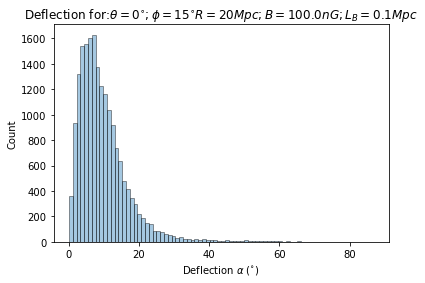

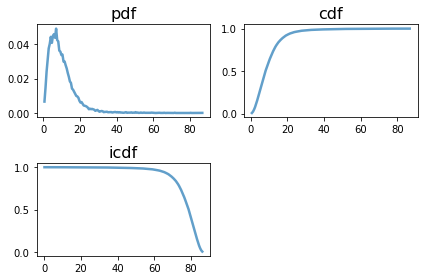

In [14]:

# deflectionDistribution(240,0.001,1.0,20,40)
deflectionDistribution(20,100.0,0.1,80,15)
# deflectionDistribution(240,0.001,1.0,20,360)

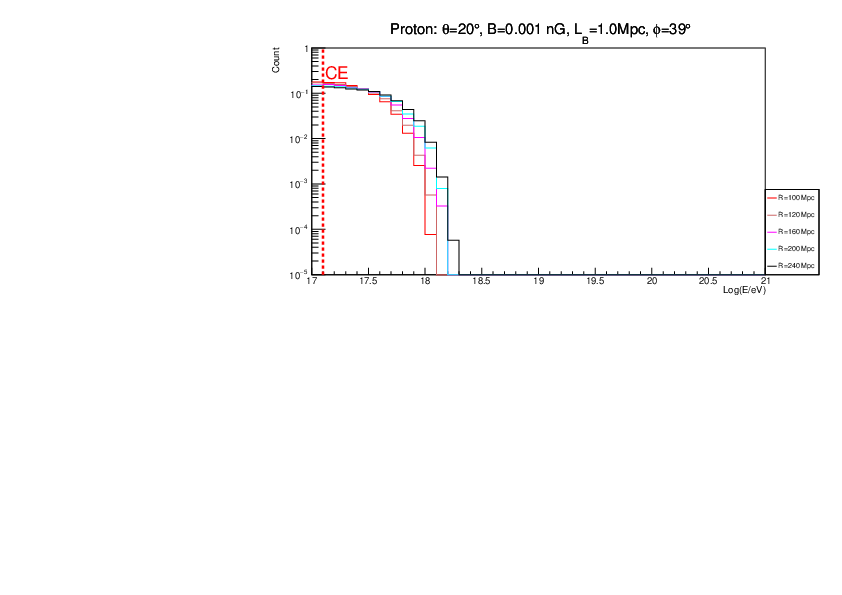

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_20/cone_angle39/proton/L_B_1.0Mpc/B_0.001nG/plot/pdfs_saved/Energy_spectrum_angle20_LB_1.0Mpc_B0.001nG.pdf")

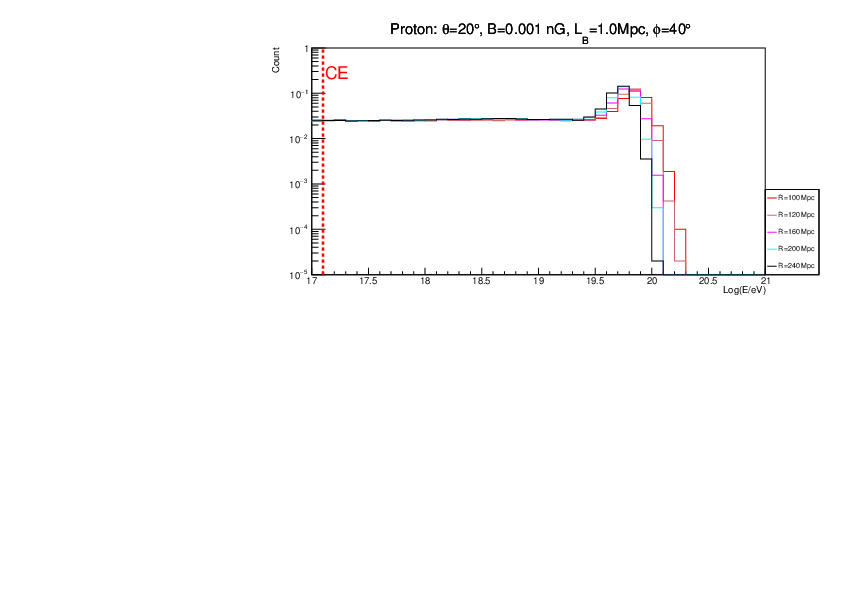

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_20/cone_angle40/proton/L_B_1.0Mpc/B_0.001nG/plot/pdfs_saved/Energy_spectrum_angle20_LB_1.0Mpc_B0.001nG.pdf")

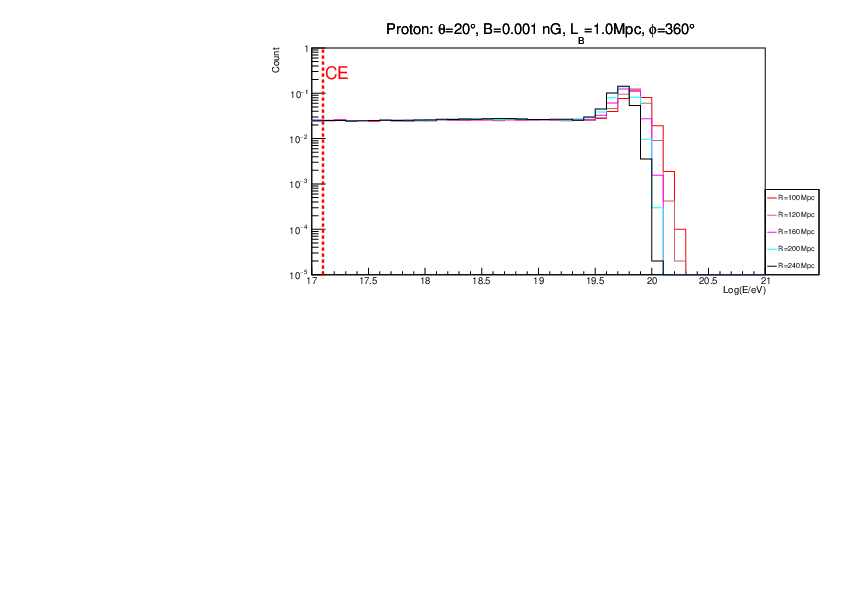

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_20/cone_angle360/proton/L_B_1.0Mpc/B_0.001nG/plot/pdfs_saved/Energy_spectrum_angle20_LB_1.0Mpc_B0.001nG.pdf")

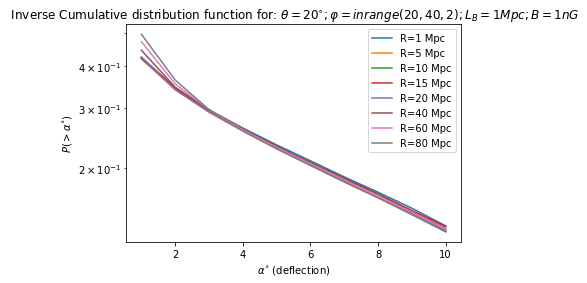

$\alpha_min$= 0.00229 $\phi$= 40
$\alpha_max$= 39.990443 $\phi$= 40
$\alpha_min$= 0.00229 $\phi$= 100
$\alpha_max$= 69.994271 $\phi$= 100
$\alpha_min$= 0.00229 $\phi$= 360
$\alpha_max$= 179.11603200000002 $\phi$= 360


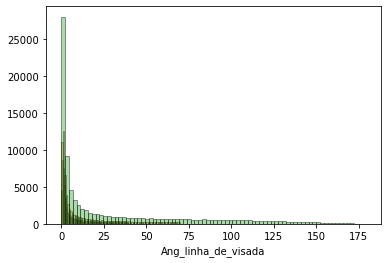

In [ ]:
plt.plot(defle1,perc1,label="R=1 Mpc")
plt.plot(defle5,perc5,label="R=5 Mpc")
plt.plot(defle10,perc10,label="R=10 Mpc")
plt.plot(defle15,perc15,label="R=15 Mpc")
plt.plot(defle20,perc20,label="R=20 Mpc")
plt.plot(defle40,perc40,label="R=40 Mpc")
plt.plot(defle60,perc60,label="R=60 Mpc")
plt.plot(defle80,perc80,label="R=80 Mpc")
# plt.ylim(1e-9,1e0)
plt.yscale("log")
plt.xlabel(r'$\alpha^{\circ}$ (deflection)')
plt.ylabel(r'$P(>\alpha^{\circ})$')
plt.title(r" Inverse Cumulative distribution function for: $\theta=20^{\circ}; \varphi=in range(20,40,2); L_{B}=1Mpc; B=1nG$")
plt.legend(loc="best")
plt.show()
deflectionDistribution(80,1.0,1.0,20,40)
deflectionDistribution(80,1.0,1.0,20,100)
deflectionDistribution(80,1.0,1.0,20,360)



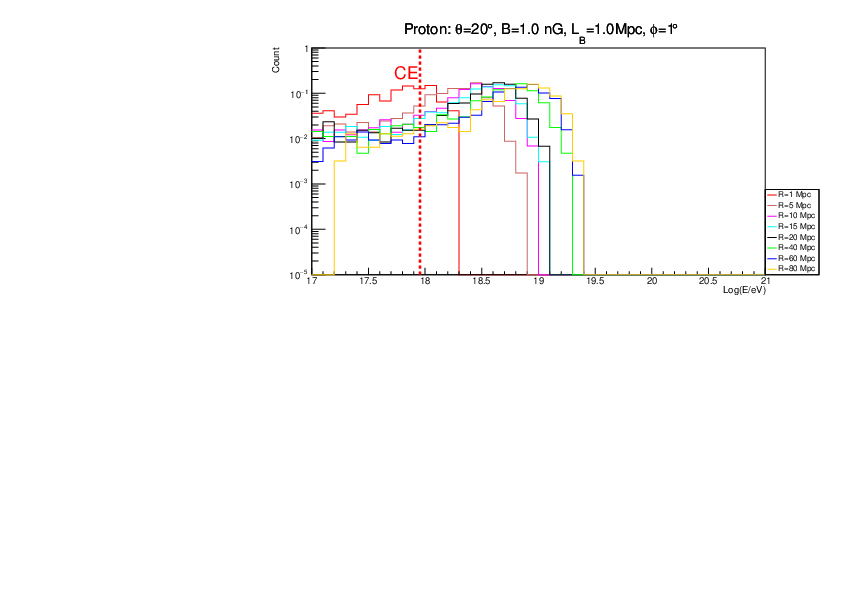

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_20/cone_angle1/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle20_LB_1.0Mpc_B1.0nG.pdf")

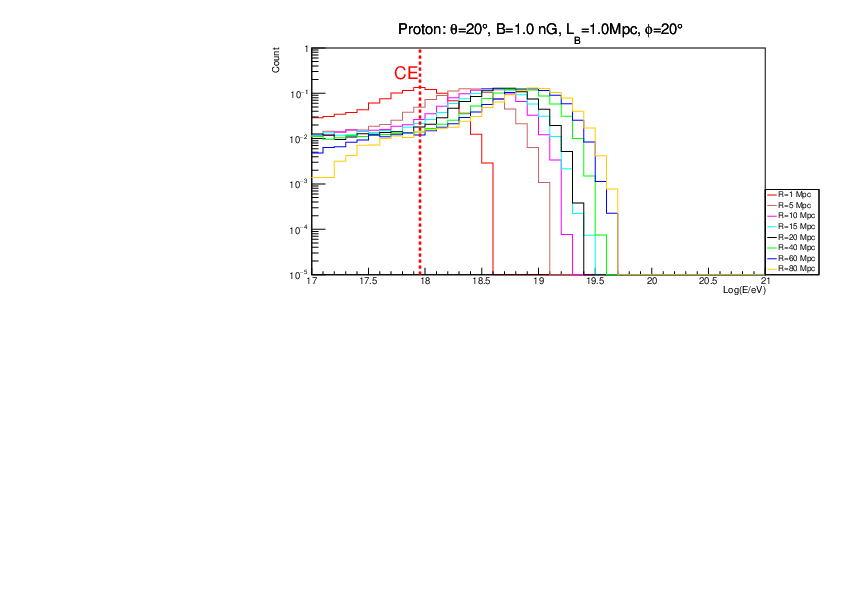

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_20/cone_angle20/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle20_LB_1.0Mpc_B1.0nG.pdf")

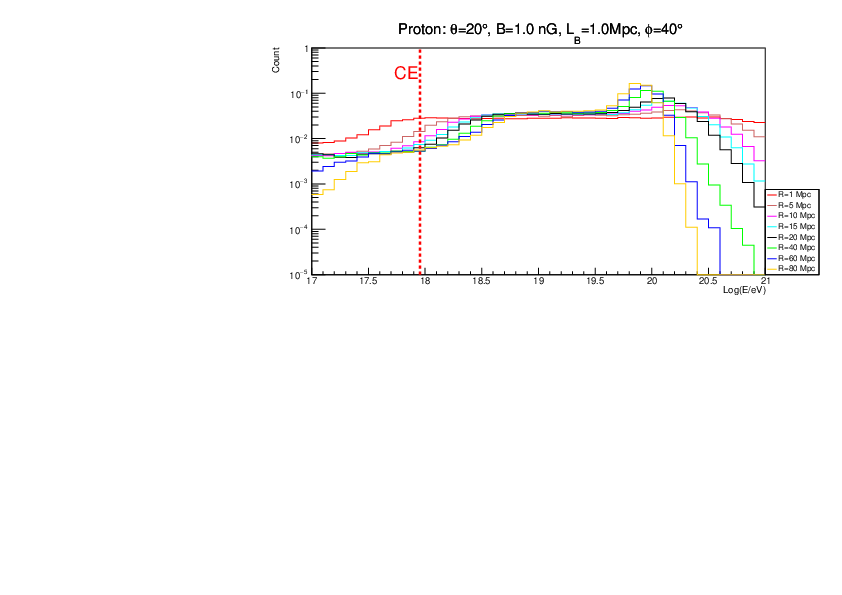

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_20/cone_angle40/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle20_LB_1.0Mpc_B1.0nG.pdf")

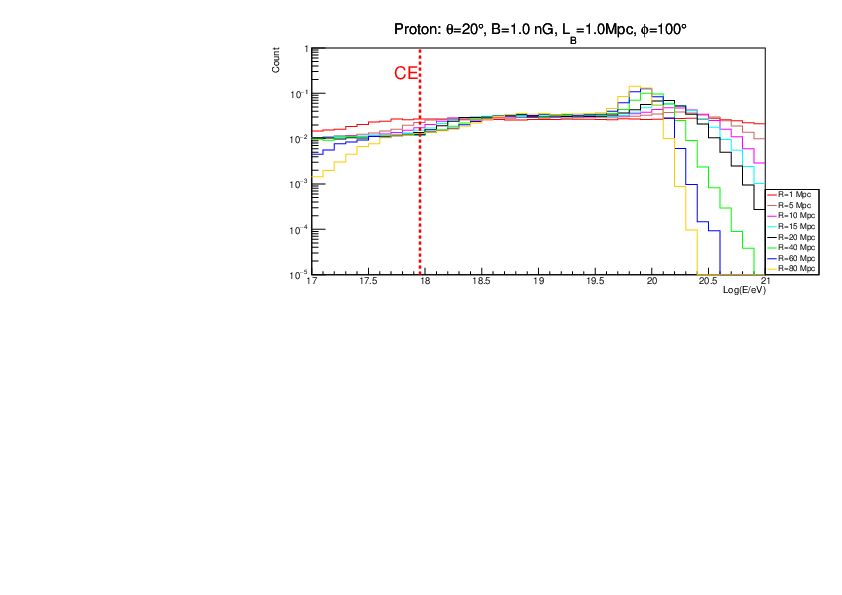

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_20/cone_angle100/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle20_LB_1.0Mpc_B1.0nG.pdf")

In [ ]:

perc1_big, defle1_big, elo1_big = percVSdeflection(1,1.0,1.0,20,2,20,100)
perc5_big, defle5_big, elo5_big = percVSdeflection(5,1.0,1.0,20,2,20,100)
perc10_big, defle10_big, elo10_big = percVSdeflection(10,1.0,1.0,20,2,20,100)
perc15_big, defle15_big, elo15_big = percVSdeflection(15,1.0,1.0,20,2,20,100)
perc20_big, defle20_big, elo20_big = percVSdeflection(20,1.0,1.0,20,2,20,100)
perc40_big, defle40_big, elo40_big = percVSdeflection(40,1.0,1.0,20,2,20,100)
perc60_big, defle60_big, elo60_big = percVSdeflection(60,1.0,1.0,20,2,20,100)
perc80_big, defle80_big, elo80_big = percVSdeflection(80,1.0,1.0,20,2,20,100)

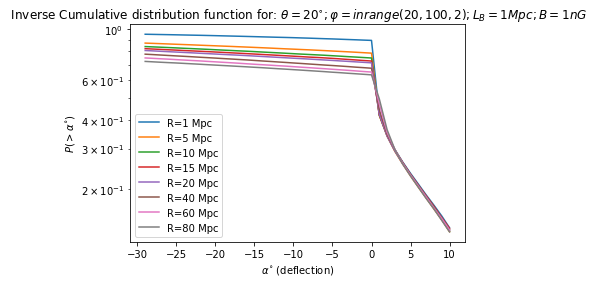

In [ ]:
plt.plot(defle1_big,perc1_big,label="R=1 Mpc")
plt.plot(defle5_big,perc5_big,label="R=5 Mpc")
plt.plot(defle10_big,perc10_big,label="R=10 Mpc")
plt.plot(defle15_big,perc15_big,label="R=15 Mpc")
plt.plot(defle20_big,perc20_big,label="R=20 Mpc")
plt.plot(defle40_big,perc40_big,label="R=40 Mpc")
plt.plot(defle60_big,perc60_big,label="R=60 Mpc")
plt.plot(defle80_big,perc80_big,label="R=80 Mpc")
# plt.ylim(1e-9,1e0)
plt.yscale("log")
plt.xlabel(r'$\alpha^{\circ}$ (deflection)')
plt.ylabel(r'$P(>\alpha^{\circ})$')
plt.title(r" Inverse Cumulative distribution function for: $\theta=20^{\circ}; \varphi=in range(20,100,2); L_{B}=1Mpc; B=1nG$")
plt.legend(loc="best")
plt.show()

In [ ]:
perc1_ang80, defle1_80, elo1_ang80 = percVSdeflection(1,1.0,1.0,80,20,20,160)
perc5_ang80, defle5_ang80, elo5_ang80 = percVSdeflection(5,1.0,1.0,80,20,20,160)
perc10_ang80, defle10_ang80, elo10_ang80 = percVSdeflection(10,1.0,1.0,80,20,20,160)
perc15_ang80, defle15_ang80, elo15_ang80 = percVSdeflection(15,1.0,1.0,80,20,20,160)
perc20_ang80, defle20_ang80, elo20_ang80 = percVSdeflection(20,1.0,1.0,80,20,20,160)
perc40_ang80, defle40_ang80, elo40_ang80 = percVSdeflection(40,1.0,1.0,80,20,20,160)
perc60_ang80, defle60_ang80, elo60_ang80 = percVSdeflection(60,1.0,1.0,80,20,20,160)
perc80_ang80, defle80_ang80, elo80_ang80 = percVSdeflection(80,1.0,1.0,80,20,20,160)

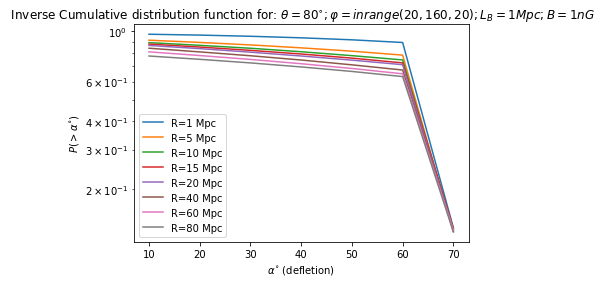

In [ ]:
plt.plot(defle1_80,perc1_ang80,label="R=1 Mpc")
plt.plot(defle5_ang80,perc5_ang80,label="R=5 Mpc")
plt.plot(defle10_ang80,perc10_ang80,label="R=10 Mpc")
plt.plot(defle15_ang80,perc15_ang80,label="R=15 Mpc")
plt.plot(defle20_ang80,perc20_ang80,label="R=20 Mpc")
plt.plot(defle40_ang80,perc40_ang80,label="R=40 Mpc")
plt.plot(defle60_ang80,perc60_ang80,label="R=60 Mpc")
plt.plot(defle80_ang80,perc80_ang80,label="R=80 Mpc")
# plt.ylim(1e-9,1e0)
plt.yscale("log")
plt.xlabel(r'$\alpha^{\circ}$ (defletion)')
plt.ylabel(r'$P(>\alpha^{\circ})$')
plt.title(r" Inverse Cumulative distribution function for: $\theta=80^{\circ}; \varphi=in range(20,160,20); L_{B}=1Mpc; B=1nG$")
plt.legend(loc="best")
plt.show()
# deflectionDistribution(80,1.0,1.0,20,40)
# deflectionDistribution(80,1.0,1.0,20,100)
# deflectionDistribution(80,1.0,1.0,20,360)


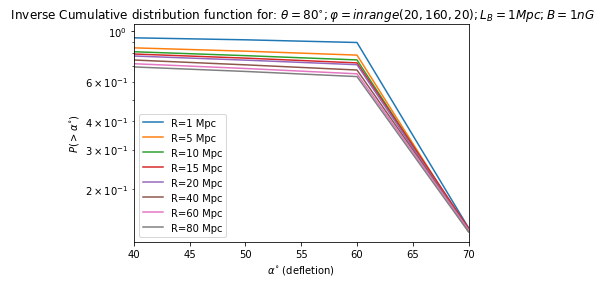

$\alpha_min$= 0.00229 $\phi$= 360
$\alpha_max$= 179.11603200000002 $\phi$= 360


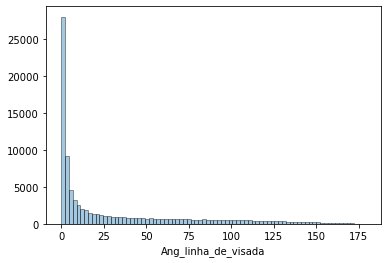

In [ ]:
plt.plot(defle1_80,perc1_ang80,label="R=1 Mpc")
plt.plot(defle5_ang80,perc5_ang80,label="R=5 Mpc")
plt.plot(defle10_ang80,perc10_ang80,label="R=10 Mpc")
plt.plot(defle15_ang80,perc15_ang80,label="R=15 Mpc")
plt.plot(defle20_ang80,perc20_ang80,label="R=20 Mpc")
plt.plot(defle40_ang80,perc40_ang80,label="R=40 Mpc")
plt.plot(defle60_ang80,perc60_ang80,label="R=60 Mpc")
plt.plot(defle80_ang80,perc80_ang80,label="R=80 Mpc")
plt.xlim(40,70)
plt.yscale("log")
plt.xlabel(r'$\alpha^{\circ}$ (defletion)')
plt.ylabel(r'$P(>\alpha^{\circ})$')
plt.title(r" Inverse Cumulative distribution function for: $\theta=80^{\circ}; \varphi=in range(20,160,20); L_{B}=1Mpc; B=1nG$")
plt.legend(loc="best")
plt.show()
deflectionDistribution(80,1.0,1.0,80,360)
# deflectionDistribution(80,1.0,1.0,20,100)
# deflectionDistribution(80,1.0,1.0,20,360)

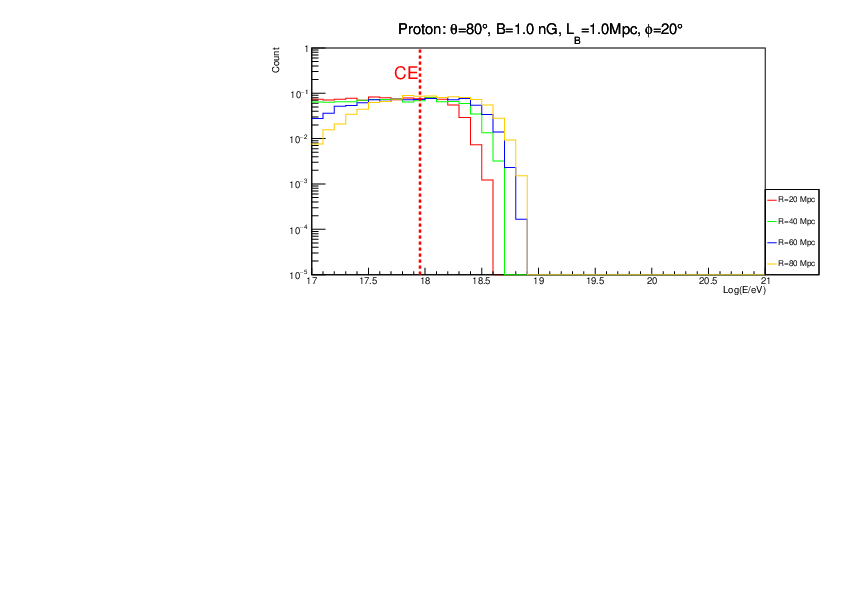

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_80/cone_angle20/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle80_LB_1.0Mpc_B1.0nG.pdf")

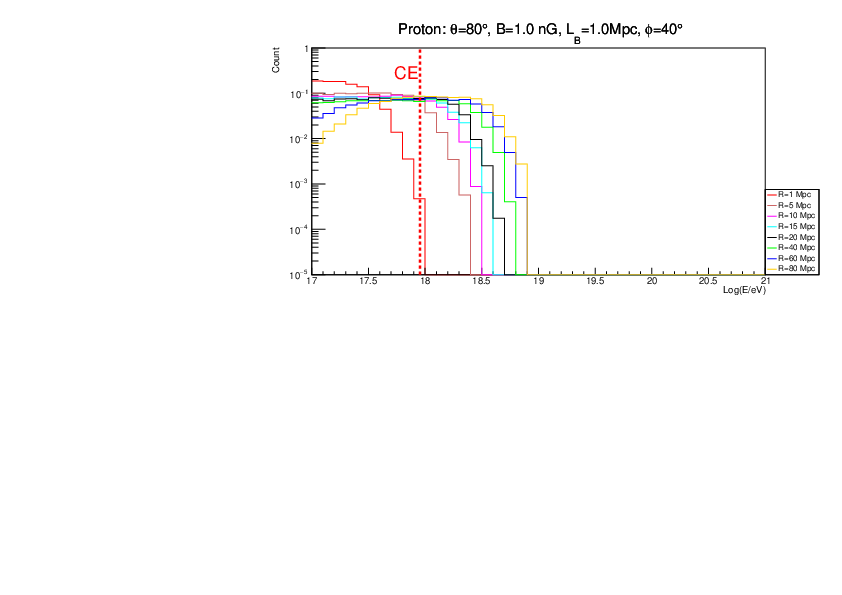

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_80/cone_angle40/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle80_LB_1.0Mpc_B1.0nG.pdf")

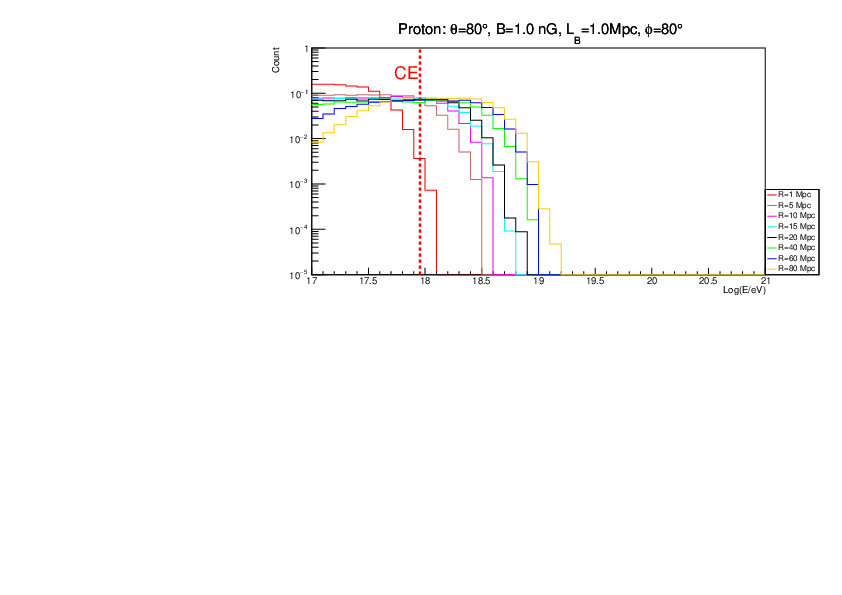

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_80/cone_angle80/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle80_LB_1.0Mpc_B1.0nG.pdf")

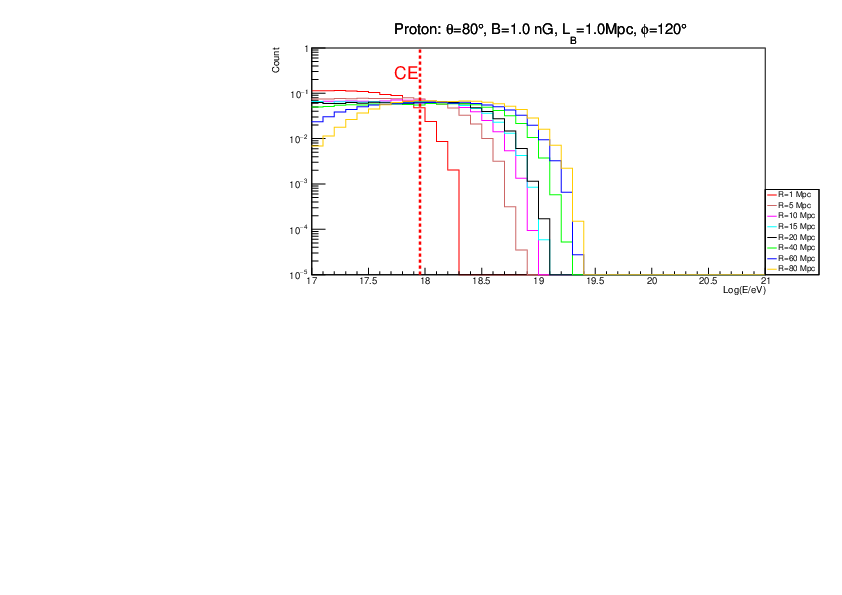

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_80/cone_angle120/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle80_LB_1.0Mpc_B1.0nG.pdf")

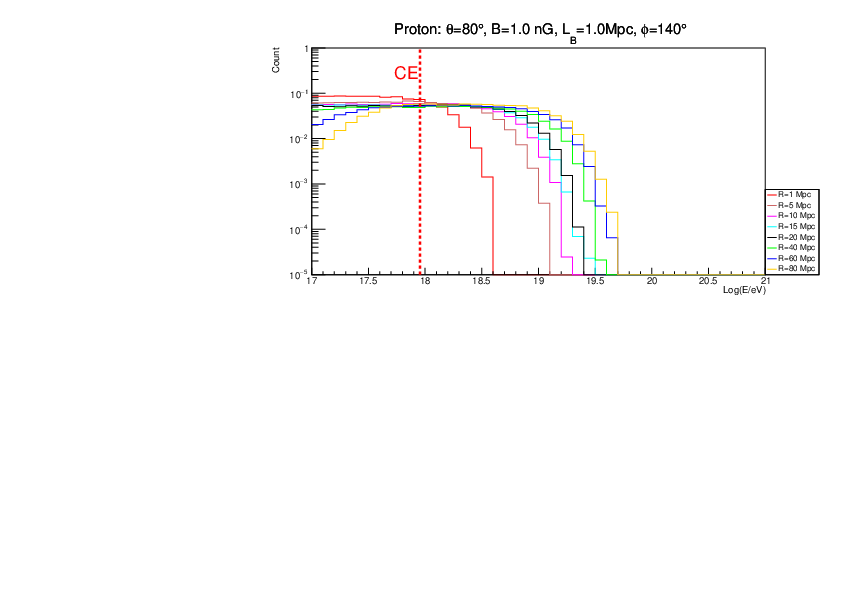

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_80/cone_angle140/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle80_LB_1.0Mpc_B1.0nG.pdf")

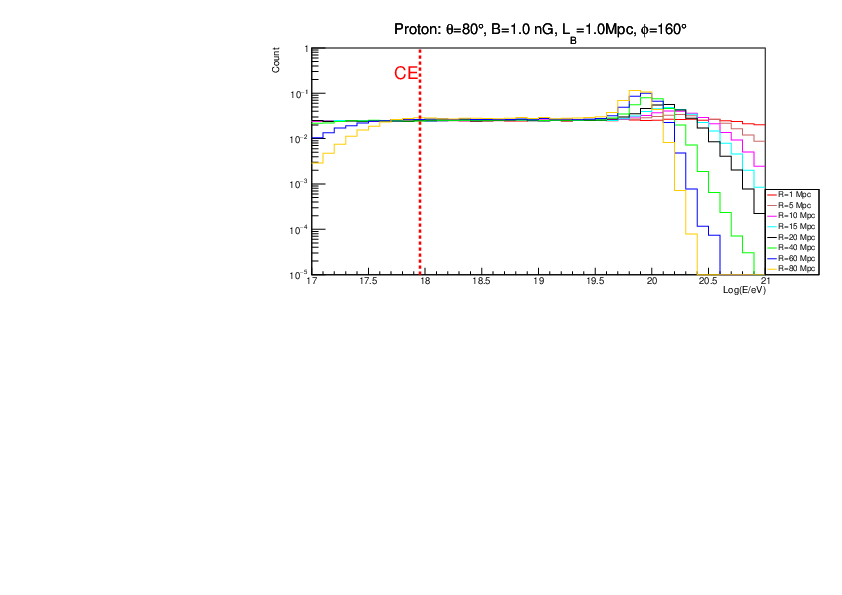

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_80/cone_angle160/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle80_LB_1.0Mpc_B1.0nG.pdf")

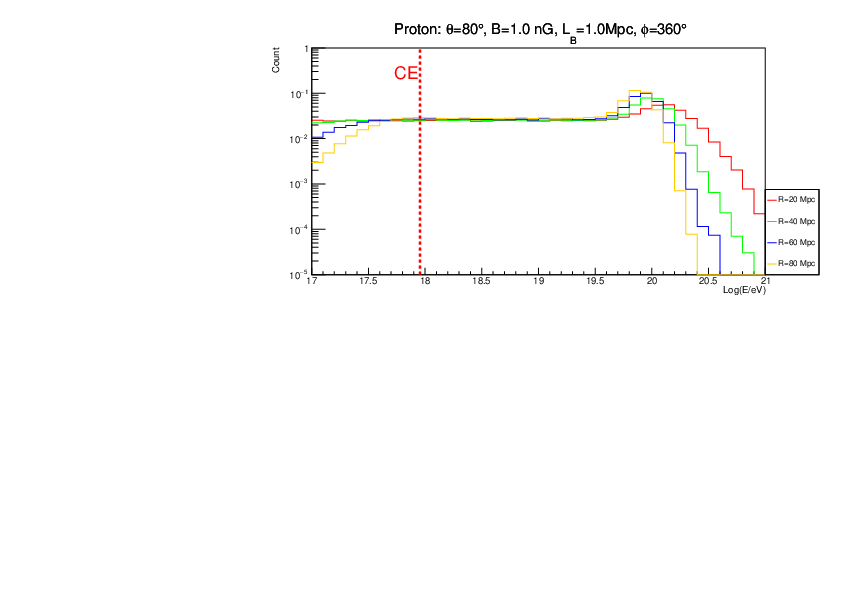

In [ ]:
WImage(filename="/mnt/c/Users/carlo/Desktop/importante/IC_reformulation/src/results/one_sphere/ang_80/cone_angle360/proton/L_B_1.0Mpc/B_1.0nG/plot/pdfs_saved/Energy_spectrum_angle80_LB_1.0Mpc_B1.0nG.pdf")

In [236]:
df=pd.read_csv(r"../../src/results/one_sphere/ang_"+str(20)+"/cone_angle"+str(40)+"/proton/L_B_"+str(1.0)+"Mpc/B_"+str(0.001)+"nG/results_R"+str(240)+".txt",sep="\s+", header=0)

In [237]:
df

,D,z,SN,ID,E,X,Y,Z,Px,Py,...,E1,X1,Y1,Z1,P1x,P1y,P1z,W,Ang_linha_de_visada,Dist_ang
0,240.032,0.0,10005.0,1.000010e+09,0.223220,61.7773,-205.6200,-107.25800,0.253865,-0.856980,...,0.223248,0.0,0.0,0.0,0.277577,-0.847339,-0.452735,1.0,1.318340,NaN
1,240.001,0.0,10007.0,1.000010e+09,22.728100,-137.4750,-172.3840,94.78870,-0.572958,-0.718298,...,27.840500,0.0,0.0,0.0,-0.572749,-0.718168,0.395213,1.0,0.016346,NaN
2,240.003,0.0,10008.0,1.000010e+09,0.717130,-175.5080,97.9349,131.17200,-0.733650,0.408235,...,0.719618,0.0,0.0,0.0,-0.727815,0.404754,0.553588,1.0,0.487877,NaN
3,240.002,0.0,10006.0,1.000010e+09,0.812530,236.1470,41.7642,9.54013,0.983001,0.180196,...,0.816833,0.0,0.0,0.0,0.984939,0.168865,0.037153,1.0,0.335465,NaN
4,240.001,0.0,10003.0,1.000010e+09,1.606520,-31.4377,204.5960,-121.46000,-0.130391,0.853022,...,1.656870,0.0,0.0,0.0,-0.128876,0.851622,-0.508067,1.0,0.173291,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,240.001,0.0,99997.0,1.000010e+09,25.945300,101.3430,101.9340,192.19700,0.422379,0.424795,...,31.766300,0.0,0.0,0.0,0.422223,0.424862,0.800762,1.0,0.008832,NaN
99997,240.001,0.0,99998.0,1.000010e+09,1.662460,177.3420,94.8059,131.00500,0.741211,0.393553,...,1.718210,0.0,0.0,0.0,0.737457,0.395417,0.547541,1.0,0.130080,NaN
99998,240.001,0.0,99999.0,1.000010e+09,2.557400,-49.8239,-206.3180,112.03000,-0.208304,-0.860576,...,2.732550,0.0,0.0,0.0,-0.209562,-0.858957,0.467200,1.0,0.121673,NaN
99999,240.001,0.0,100000.0,1.000010e+09,7.062670,-154.3290,121.7590,-137.68700,-0.642824,0.507359,...,8.278820,0.0,0.0,0.0,-0.642668,0.507459,-0.573989,1.0,0.028029,NaN


In [248]:
count,bins_count=np.histogram(df["Ang_linha_de_visada"],bins=100, range=(int(df['Ang_linha_de_visada'].min()),int(df['Ang_linha_de_visada'].max())))

In [249]:
bins_count

array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ,
       0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44, 1.52, 1.6 , 1.68,
       1.76, 1.84, 1.92, 2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56,
       2.64, 2.72, 2.8 , 2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44,
       3.52, 3.6 , 3.68, 3.76, 3.84, 3.92, 4.  , 4.08, 4.16, 4.24, 4.32,
       4.4 , 4.48, 4.56, 4.64, 4.72, 4.8 , 4.88, 4.96, 5.04, 5.12, 5.2 ,
       5.28, 5.36, 5.44, 5.52, 5.6 , 5.68, 5.76, 5.84, 5.92, 6.  , 6.08,
       6.16, 6.24, 6.32, 6.4 , 6.48, 6.56, 6.64, 6.72, 6.8 , 6.88, 6.96,
       7.04, 7.12, 7.2 , 7.28, 7.36, 7.44, 7.52, 7.6 , 7.68, 7.76, 7.84,
       7.92, 8.  ])

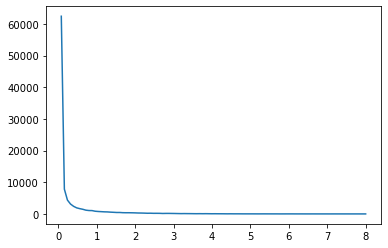

In [250]:
plt.plot(bins_count[1:],count)
# plt.yscale("log")

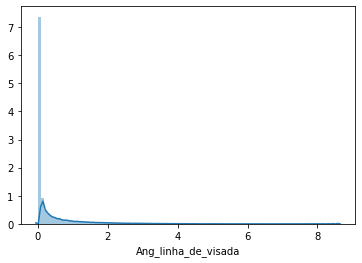

In [241]:
sns.distplot(df['Ang_linha_de_visada'],hist=True,bins=100)

In [193]:
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))

In [194]:
a

array([ 1.3315865 ,  0.71527897, -1.54540029, ...,  5.74446677,
        6.22449239,  8.42055014])

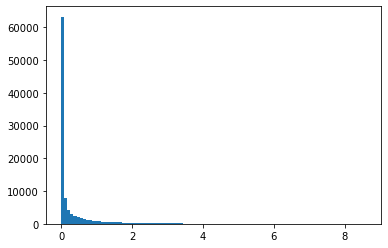

In [205]:
a=plt.hist(df['Ang_linha_de_visada'],bins=100)

In [204]:
a[1]

array([1.60000000e-05, 1.05343121e-02, 2.10526242e-02, 3.15709364e-02,
       4.20892485e-02, 5.26075606e-02, 6.31258727e-02, 7.36441848e-02,
       8.41624969e-02, 9.46808091e-02, 1.05199121e-01, 1.15717433e-01,
       1.26235745e-01, 1.36754058e-01, 1.47272370e-01, 1.57790682e-01,
       1.68308994e-01, 1.78827306e-01, 1.89345618e-01, 1.99863930e-01,
       2.10382242e-01, 2.20900554e-01, 2.31418867e-01, 2.41937179e-01,
       2.52455491e-01, 2.62973803e-01, 2.73492115e-01, 2.84010427e-01,
       2.94528739e-01, 3.05047051e-01, 3.15565364e-01, 3.26083676e-01,
       3.36601988e-01, 3.47120300e-01, 3.57638612e-01, 3.68156924e-01,
       3.78675236e-01, 3.89193548e-01, 3.99711860e-01, 4.10230173e-01,
       4.20748485e-01, 4.31266797e-01, 4.41785109e-01, 4.52303421e-01,
       4.62821733e-01, 4.73340045e-01, 4.83858357e-01, 4.94376670e-01,
       5.04894982e-01, 5.15413294e-01, 5.25931606e-01, 5.36449918e-01,
       5.46968230e-01, 5.57486542e-01, 5.68004854e-01, 5.78523166e-01,
      

In [277]:
len(bins_count[::-1])

101

In [292]:
pdf=count/sum(count)
cdf=np.cumsum(pdf)

In [301]:
len(bins_count)

101

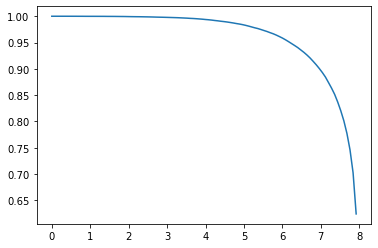

In [314]:
plt.plot(ibins_count[1:],cdf)